Sample Demo

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    "Thor eating pizza, Loki is eating pizza,  Ironman ate pizza already",
    "Apple is announcing  new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes",
    "something is amazing"
]

In [2]:
tf = TfidfVectorizer()
transformed_corpus = tf.fit_transform(corpus)
print(tf.vocabulary_)

{'thor': 27, 'eating': 11, 'pizza': 23, 'loki': 18, 'is': 17, 'ironman': 16, 'ate': 8, 'already': 0, 'apple': 6, 'announcing': 5, 'new': 21, 'iphone': 15, 'tomorrow': 28, 'tesla': 26, 'model': 20, 'google': 13, 'pixel': 22, 'microsoft': 19, 'surface': 25, 'amazon': 3, 'eco': 12, 'dot': 10, 'am': 1, 'biryani': 9, 'and': 4, 'you': 29, 'are': 7, 'grapes': 14, 'something': 24, 'amazing': 2}


In [3]:
dir(tf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_tfidf',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 

In [4]:
# single idf score
all_features = tf.get_feature_names_out()

for word in all_features:
    indx = tf.vocabulary_.get(word)
    print( word, f" {tf.idf_[indx]}")

already  2.504077396776274
am  2.504077396776274
amazing  2.504077396776274
amazon  2.504077396776274
and  2.504077396776274
announcing  1.4054651081081644
apple  2.504077396776274
are  2.504077396776274
ate  2.504077396776274
biryani  2.504077396776274
dot  2.504077396776274
eating  2.09861228866811
eco  2.504077396776274
google  2.504077396776274
grapes  2.504077396776274
iphone  2.504077396776274
ironman  2.504077396776274
is  1.1177830356563834
loki  2.504077396776274
microsoft  2.504077396776274
model  2.504077396776274
new  1.4054651081081644
pixel  2.504077396776274
pizza  2.504077396776274
something  2.504077396776274
surface  2.504077396776274
tesla  2.504077396776274
thor  2.504077396776274
tomorrow  1.4054651081081644
you  2.504077396776274


### Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification


- This data consists of two columns.

| Text | Label | 
| --- | --- |
| Indira Designer Women's Art Mysore Silk Saree With Blouse Piece (Star-Red) This Saree Is Of Art Mysore Silk & Comes With Blouse Piece. | Clothing & Accessories | 
|IO Crest SY-PCI40010 PCI RAID Host Controller Card Brings new life to any old desktop PC. Connects up to 4 SATA II high speed SATA hard disk drives. Supports Windows 8 and Server 2012|Electronics|
|Operating Systems in Depth About the Author Professor Doeppner is an associate professor of computer science at Brown University. His research interests include mobile computing in education, mobile and ubiquitous computing, operating systems and distribution systems, parallel computing, and security.|Books|

- ***Text***: Description of an item sold on e-commerce website
- ***Label***: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.


In [5]:
import pandas as pd

#read the data into a pandas dataframe

df = pd.read_csv("../NLP/nlp-tutorials-main/12_tf_idf/Ecommerce_data.csv")
print(df.shape)
df.head(5)

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [6]:
# check for imbalance
df.label.value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

In [7]:
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [8]:
#Add the new column which gives a unique number to each of these labels 

df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

#checking the results 
df.head(5)

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2,
    random_state=1000,
    stratify=df.label_num)

In [10]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)


Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1200
           1       0.96      0.95      0.96      1200
           2       0.97      0.96      0.97      1200
           3       0.97      0.98      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [12]:
# RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1200
           1       0.98      0.96      0.97      1200
           2       0.98      0.96      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [13]:
import spacy

nlp = spacy.load("en_core_web_sm")

c:\Users\Ola\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [14]:
def process(text):
    filtered_text = []

    doc = nlp(text)
    for token in doc:
        if  token.is_punct or token.is_stop:
            continue
        filtered_text.append(token.lemma_)
    return " ".join(filtered_text)

In [15]:
df["new_text"] = df.Text.apply(process)

In [16]:
df.head()

,Text,label,label_num,new_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY pci40010 pci RAID Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer Women Art Mysore Silk Saree Bl...


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    df.new_text,
    df.label_num,
    test_size=0.2,
    stratify=df.label_num
)

In [18]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



<AxesSubplot:>

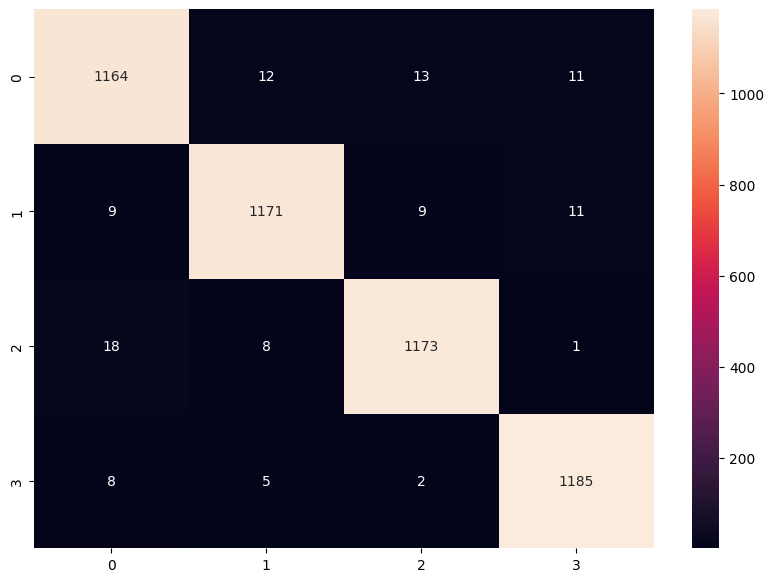

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')

- using TdifVectorizer.
- use **MultinomialNB** as the classifier.
- print the classification report.


In [21]:
from sklearn.naive_bayes import MultinomialNB
#1. create a pipeline object

model = Pipeline([
    ("td_if", TfidfVectorizer()),
    ("classifer", MultinomialNB())
])

#2. fit with X_train and y_train
model.fit(X_train, X_test)


#3. get the predictions for X_test and store it in y_pred
y_pred = model.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [19200, 4800]